In [1]:
import os
import cv2
import tqdm
import numpy as np
import seamcarving as sc
from matplotlib import pyplot as plt

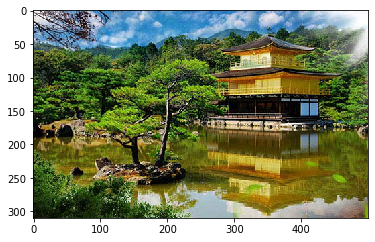

In [8]:
# load image
image_name = "jinge.jpg"
image_path = os.path.join("images", image_name)
image = sc.load_image(image_path)
sc.show_image_plt(image)

100%|██████████| 100/100 [00:01<00:00, 58.83it/s]


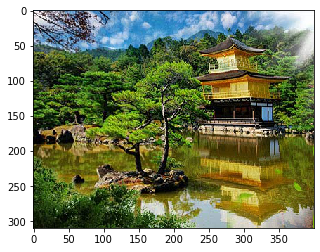

In [9]:
# remove seams normally
current_image = np.copy(image)
for i in tqdm.tqdm(range(100)):
    current_energy = sc.laplacian_energy(current_image)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
sc.show_image_plt(current_image)

100%|██████████| 100/100 [00:01<00:00, 63.40it/s]


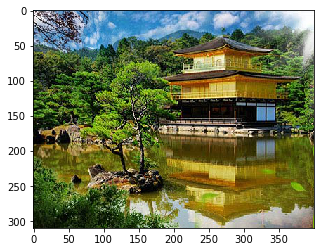

In [10]:
# remove with mask preserving
current_mask = sc.draw_mask(image)
current_image = np.copy(image)
for i in tqdm.tqdm(range(100)):
    current_energy = sc.laplacian_energy(current_image)
    current_energy = sc.energy_with_protect_mask(current_energy, current_mask)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
    current_mask = sc.remove_seam(current_mask, current_seam)
sc.show_image_plt(current_image)

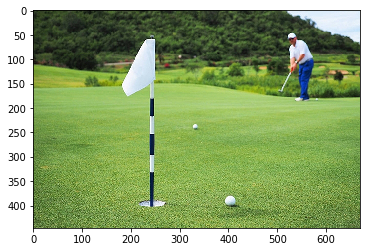

In [5]:
# load image
image_name = "golf.jpg"
image_path = os.path.join("images", image_name)
image = sc.load_image(image_path)
sc.show_image_plt(image)

100%|██████████| 100/100 [00:03<00:00, 32.20it/s]


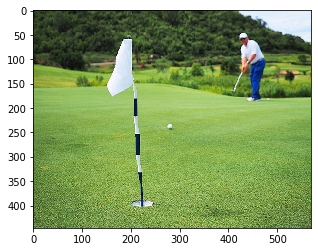

In [6]:
# removal mask
current_mask = sc.draw_mask(image)
current_image = np.copy(image)
for i in tqdm.tqdm(range(100)):
    current_energy = sc.laplacian_energy(current_image)
    current_energy = sc.energy_with_remove_mask(current_energy, current_mask)
    current_seam = sc.seam_with_minimum_energy(current_energy)
    current_image = sc.remove_seam(current_image, current_seam)
    current_mask = sc.remove_seam(current_mask, current_seam)
sc.show_image_plt(current_image)